# Melakukan Analisis Dasar

* **Produk yang digunakan:** 
[s2_l2a](https://explorer.digitalearth.africa/s2_l2a)
* **Prasyarat**:  Pengguna notebook ini harus memiliki pemahaman dasar tentang:
    * Cara menjalankan [Jupyter notebook](01_Jupyter_notebooks.ipynb)
    * Memeriksa produk dan pengukuran yang tersedia di [Piksel Products and measurement](02_Product_dan_measurement.ipynb)
    * Cara [membuka data Piksel](03_Membuka_data.ipynb)
    * Cara [plotting data](04_Plotting.ipynb)

## Latar Belakang
Untuk memahami dunia di sekitar kita, penting untuk menggabungkan langkah-langkah utama dalam memuat, memvisualisasikan, menganalisis, dan menafsirkan data satelit.
Untuk melakukan analisis, kita memulai dengan sebuah pertanyaan dan menggunakan langkah-langkah ini untuk mencapai jawaban.

## Deskripsi
Notebook ini menunjukkan cara melakukan analisis dasar dengan data Piksel dan Open Data Cube.
Notebook ini akan menggabungkan banyak langkah yang telah dibahas dalam notebook pemula lainnya.



Dalam notebook ini, pertanyaan analisis yang akan dijawab adalah:
_"Bagaimana perubahan kesehatan vegetasi seiring waktu di suatu area tertentu?"_

* Apa dampak praktik penggunaan lahan baru terhadap lahan pertanian?
* Bagaimana perubahan suatu area hutan setelah kebakaran?
* Bagaimana kedekatan dengan air memengaruhi vegetasi sepanjang tahun?

Untuk notebook ini, pertanyaan analisis akan tetap sederhana tanpa banyak konteks dunia nyata.
Untuk contoh lain tentang cara menggunakan Piksel untuk menjawab pertanyaan analisis tertentu, lihat notebook dalam folder ".......".

1. Memilih area studi.
2. Memuat data untuk area studi.
3. Memplot data yang dipilih dan mengeksplorasi perubahannya seiring waktu.
4. Menghitung ukuran kesehatan vegetasi dari data yang dimuat.
5. Mengekspor data untuk analisis lebih lanjut.

***

## Memulai

Untuk menjalankan pengenalan ini dalam melakukan analisis dasar dengan data Piksel dan datacube, jalankan semua sel dalam notebook mulai dari sel "Memuat paket". Untuk bantuan dalam menjalankan sel notebook, lihat kembali ke [Jupyter notebook](http://43.218.254.133:8888/notebooks/panduan-pengguna/01_Jupyter_notebooks.ipynb)

### Memuat paket

Sel di bawah ini mengimpor paket Python yang digunakan untuk analisis. 
Perintah pertama adalah `%matplotlib inline`, yang memastikan bahwa grafik ditampilkan dengan benar di Jupyter Notebook. 
Perintah berikutnya mengimpor berbagai fungsi:

* `piksel_tools` berisi fungsi pendukung yang berguna, termasuk modul [plotting data](http://43.218.254.133:8888/notebooks/panduan-pengguna/04_Plotting.ipynb), yang digunakan dalam notebook ini.
* `datacube` memungkinkan untuk melakukan kueri dan memuat data.
* `matplotlib` menyediakan kemampuan untuk memformat dan memanipulasi grafik

In [2]:
!pip install datacube odc-algo odc-ui odc-stac

!pip install matplotlib

  Using cached odc_algo-1.0.1-py3-none-any.whl.metadata (2.7 kB)
  Using cached odc_ui-0.2.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached dask_image-2024.5.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached jupyter_ui_poll-1.0.0-py2.py3-none-any.whl.metadata (7.3 kB)
  Using cached pims-0.7-py3-none-any.whl
  Using cached slicerator-1.1.0-py3-none-any.whl.metadata (1.9 kB)
Using cached odc_algo-1.0.1-py3-none-any.whl (48 kB)
Using cached odc_ui-0.2.1-py3-none-any.whl (15 kB)
Using cached dask_image-2024.5.3-py3-none-any.whl (59 kB)
Using cached slicerator-1.1.0-py3-none-any.whl (10 kB)
Using cached jupyter_ui_poll-1.0.0-py2.py3-none-any.whl (9.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [odc-ui]2m4/6 [odc-algo]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dea-tools 0.4.0 requires fiona>=1.10.0, which is not installed.
dea-tools 0.4.0 requires

In [3]:
!pip install fiona
!pip install odc-io
!pip install owslib
!pip install rasterstats

  Using cached fiona-1.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (56 kB)
Using cached fiona-1.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dea-tools 0.4.0 requires odc-io>=0.2.2, which is not installed.
dea-tools 0.4.0 requires owslib>=0.26.0, which is not installed.
dea-tools 0.4.0 requires rasterstats>=0.16.0, which is not installed.
  Using cached odc_io-0.2.2-py3-none-any.whl.metadata (474 bytes)
Using cached odc_io-0.2.2-py3-none-any.whl (10 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dea-tools 0.4.0 requires owslib>=0.26.0, which is not installed.
dea-tools 0.4.0 requires rasterstats>=0.16.0, which is not installed.


In [39]:
%matplotlib inline

import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from dea_tools.plotting import display_map, rgb

### Terhubung ke Datacube

Langkah selanjutnya adalah menghubungkan ke basis data datacube.
Objek datacube `dc` yang dihasilkan kemudian dapat digunakan untuk memuat data.
Parameter `app` adalah nama unik yang digunakan untuk mengidentifikasi notebook, tetapi tidak berpengaruh pada analisis

In [40]:
dc = datacube.Datacube(app="05_Analisis_dasar")

## Langkah 1: Memilih Area Studi

Saat bekerja dengan Open Data Cube, penting untuk memuat hanya sebanyak data yang diperlukan.
Hal ini membantu menjaga analisis tetap berjalan dengan cepat dan menghindari notebook mengalami crash akibat kekurangan memori.

Salah satu cara untuk menetapkan area studi adalah dengan menentukan pasangan koordinat lintang dan bujur pusat, `(central_lat, central_lon)`, lalu menentukan berapa derajat yang akan disertakan di kedua sisi lintang dan bujur pusat, yang disebut sebagai `buffer`.
Kombinasi parameter ini menentukan area studi berbentuk persegi, seperti ditunjukkan di bawah ini:

![Buffer Map](05_latlong_buffer.png)

### Lokasi
Di bawah ini, kami telah menetapkan area studi yang mencakup kawasan pertanian di Afrika Selatan.
Untuk memuat area yang berbeda, Anda dapat menyediakan nilai `central_lat` dan `central_lon` sendiri.
Salah satu cara untuk mendapatkan koordinat ini adalah dengan mencari lokasi di Google atau mengklik langsung pada peta di [Google Maps](https://www.google.com/maps/place/6%C2%B028'04.8%22S+107%C2%B005'21.3%22E/@-6.4679847,107.0866851,757m/data=!3m2!1e3!4b1!4m4!3m3!8m2!3d-6.46799!4d107.08926?entry=ttu&g_ep=EgoyMDI1MDIxMi4wIKXMDSoASAFQAw%3D%3D).
Cara lainnya adalah:

* **Jonggol, Kabupaten Bogor**
```
central_lat = -6.46799
central_lon = 107.08926
```
> **Note**: Jika Anda mengubah lintang dan bujur area studi, Anda perlu menjalankan ulang semua sel setelahnya agar perubahan tersebut diterapkan ke seluruh analisis.

### Buffer
Jangan ragu untuk bereksperimen dengan nilai `buffer` untuk memuat area dengan ukuran berbeda.
Kami menyarankan agar Anda menjaga nilai `buffer` tetap kecil, tidak lebih dari `buffer=0.1` derajat.
Hal ini akan membantu menjaga waktu pemuatan tetap wajar dan mencegah notebook mengalami crash.


> **Ekstensi**: Dapatkah Anda memodifikasi kode agar menggunakan nilai `buffer` yang berbeda untuk `lintang` dan `bujur`?

> *Petunjuk*: Anda mungkin ingin menggunakan dua variabel, buffer_lat dan buffer_lon, yang dapat diatur secara independen.
Setelah itu, Anda perlu memperbarui definisi `study_area_lat` dan `study_area_lon` dengan nilai `buffer` yang sesuai.

In [41]:
# Tetapkan pusat lintang dan bujur
central_lat = -6.46799
central_lon = 107.08926
# Tetapkan buffer untuk memuat area di sekitar koordinat pusat.
buffer = 0.03

# Hitung bounding box untuk area studi.
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)


Setelah memilih area studi, akan bermanfaat untuk memvisualisasikannya di peta interaktif.
Ini memberikan gambaran tentang skala area tersebut.


>**Catatan**: Peta interaktif juga menampilkan nilai lintang dan bujur saat diklik.
Anda dapat menggunakan fitur ini untuk menghasilkan nilai lintang dan bujur baru tanpa harus keluar dari notebook.

In [42]:
display_map(x=study_area_lon, y=study_area_lat)

## Langkah 2: Memuat data


Saat mengajukan pertanyaan analisis tentang vegetasi, akan berguna untuk bekerja dengan citra optik, seperti Sentinel-2 atau Landsat.
Satelit Sentinel-2 memiliki resolusi 10 meter dan menyimpan data sejak tahun 2017.


Kode di bawah ini menyiapkan informasi yang diperlukan untuk memuat data.

In [43]:
# Tetapkan sumber data - s2a merujuk pada Sentinel-2A  
set_product = "s2_l2a"

# Tetapkan rentang tanggal untuk memuat data
set_time = ("2024-07-01", "2024-07-31")

# Tetapkan pengukuran/band yang akan dimuat  
# Untuk analisis ini, kita akan memuat band merah, biru, hijau, dan near-infrared 
set_measurements = [
    "red",
    "blue",
    "green",
    "nir"
]

# Tetapkan sistem referensi koordinat dan resolusi keluaran
set_crs = 'EPSG:32748'
set_resolution = (-10, 10)

Setelah menetapkan semua parameter yang diperlukan, perintah `dc.load()` digunakan untuk memuat data:

In [54]:


dataset = dc.load(
    product='s2_l2a',
    x=(107.0, 107.1),
    y=(-6.6, -6.5),
    time=('2023-01-01', '2023-01-10'),
    measurements=['red', 'green', 'blue','nir'],
    output_crs='EPSG:32748',
    resolution=10,
    group_by='solar_day'
)


Querying product Product(name='s2_l2a', id_=9)



Setelah langkah pemuatan, mencetak objek `dataset` akan memberikan wawasan tentang semua data yang telah dimuat.
Lakukan ini dengan menjalankan sel berikutnya.

Ada banyak informasi yang perlu dipahami, yang direpresentasikan oleh aspek-aspek berikut dalam data:

- `Dimensions`: Nama dimensi data, biasanya `time`, `x`, dan `y`, serta jumlah entri dalam setiap dimensi.
- `Coordinates`: Nilai koordinat untuk setiap titik dalam data cube.
- `Data variables`: Observasi yang dimuat, biasanya berbagai band spektral dari satelit.
- `Attributes`: Informasi tambahan yang berguna tentang data, seperti `crs` (coordinate reference system).

In [55]:
dataset.red.attrs

{'units': '1', 'nodata': 0, 'crs': 'EPSG:32748', 'grid_mapping': 'spatial_ref'}

In [56]:
print(dataset)

<xarray.Dataset> Size: 30MB
Dimensions:      (time: 3, y: 1111, x: 1112)
Coordinates:
  * time         (time) datetime64[ns] 24B 2023-01-04T03:19:53.464000 ... 202...
  * y            (y) float64 9kB 9.281e+06 9.281e+06 ... 9.27e+06 9.27e+06
  * x            (x) float64 9kB 7.211e+05 7.211e+05 ... 7.322e+05 7.322e+05
    spatial_ref  int32 4B 32748
Data variables:
    red          (time, y, x) uint16 7MB 1958 1940 1966 1983 ... 4320 4348 4336
    green        (time, y, x) uint16 7MB 2178 2198 2214 2222 ... 4704 4796 4872
    blue         (time, y, x) uint16 7MB 2054 2034 2048 2058 ... 5196 5220 5148
    nir          (time, y, x) uint16 7MB 4904 4884 4876 4864 ... 5780 5788 5808
Attributes:
    crs:           EPSG:32748
    grid_mapping:  spatial_ref


## Langkah 3: Memplot Data


Setelah memuat data, akan berguna untuk melihatnya guna memahami resolusi, mengidentifikasi pengamatan yang terpengaruh oleh tutupan awan, dan mendeteksi perbedaan yang jelas antara langkah waktu (time step).


Kita menggunakan fungsi `rgb()` untuk memplot data yang dimuat pada langkah sebelumnya.
Fungsi `rgb()` memetakan tiga variabel data/pengukuran dari dataset yang dimuat ke dalam saluran red, green, dan blue yang digunakan untuk membuat gambar tiga warna.
Ada beberapa parameter yang bisa Anda coba:



* `time_step=n`\
Ini menetapkan time step yang ingin Anda lihat.
`n` bisa berupa angka apa saja dari `0` hingga satu angka lebih kecil dari jumlah time step yang dimuat.
Jumlah time step yang dimuat ditampilkan dalam hasil cetakan data, di bawah bagian `Dimensions`.
Sebagai contoh, jika di bawah `Dimensions`: Anda melihat `time: 6`, maka ada 6 time step, dan `time_step` bisa bernilai antara `0` hingga `5`.



* `bands=[red_channel, green_channel, blue_channel]`\
Ini menetapkan pengukuran yang ingin Anda gunakan untuk membuat gambar.
Pengukuran apa pun dapat dipetakan ke tiga band, dan kombinasi yang berbeda menyoroti fitur yang berbeda.
Dua kombinasi umum adalah:

    * Warna sebenarnya (true colour):
    `bands = ["red", "green", "blue"]`
    * Warna semu (false colour):
    `bands = ["nir", "red", "green"]`
    


Untuk detail lebih lanjut tentang menyesuaikan plot, lihat notebook [Pengenalan Plotting](http://43.218.254.133:8888/notebooks/panduan-pengguna/04_Plotting.ipynb). 




>**Ekstensi**: Jika `time_step` diatur sebagai array nilai, misalnya `time_step=[time_1, time_2]`, maka semua langkah waktu yang diberikan akan dipetakan.
Coba modifikasi kode untuk memplot gambar pertama dan terakhir.
Jika Anda melakukannya, perubahan apa yang Anda perhatikan?

>*Petunjuk*: Untuk mendapatkan gambar terakhir, Anda bisa menggunakan nilai langkah waktu `-1`. 


In [57]:
# tentukan time step yang diinginkan
time_step = 2

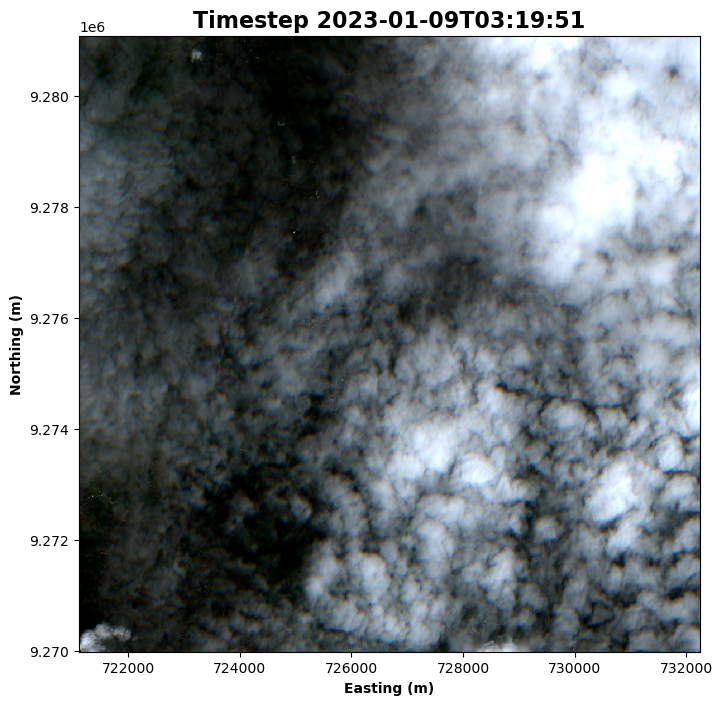

In [58]:
# Tetapkan kombinasi band untuk dipetakan
bands = ["red", "green", "blue"]

# Hasilkan gambar dengan menjalankan fungsi rgb
rgb(dataset, bands=bands, index=time_step, size=8)

# Format cap waktu untuk digunakan sebagai judul plot
time_string = str(dataset.time.isel(time=time_step).values).split('.')[0]  

# Tetapkan judul dan label sumbu
ax = plt.gca()
ax.set_title(f"Timestep {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Tampilkan plot
plt.show()


## Langkah 4: Menghitung kesehatan tanaman


Meskipun vegetasi dapat diidentifikasi dalam gambar RGB, akan lebih membantu jika kita memiliki indeks kuantitatif untuk menggambarkan kesehatannya secara langsung.


Dalam hal ini, [Normalised Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) (NDVI) dapat membantu mengidentifikasi area dengan vegetasi yang sehat.
Untuk data penginderaan jauh seperti citra satelit, NDVI didefinisikan sebagai:

$$
\begin{aligned}
\text{NDVI} & = \frac{(\text{NIR} - \text{Red})}{(\text{NIR} + \text{Red})}, \\
\end{aligned}
$$



di mana $\text{NIR}$ adalah band near-infrared dari data, dan $\text{Red}$ adalah band merah.
NDVI memiliki rentang nilai dari -1 hingga 1; nilai tinggi menunjukkan vegetasi yang sehat, sedangkan nilai negatif menunjukkan area non-vegetasi (seperti air).



Kode berikut menghitung bagian atas dan bawah dari pecahan secara terpisah, lalu menghitung nilai NDVI langsung dari komponen-komponen ini.
Nilai NDVI yang dihitung akan disimpan sebagai array data tersendiri.


> Catatan: Sebelum menghitung NDVI, kita perlu mengonversi tipe data menjadi `float32`.
Ini akan mengubah nilai nodata dalam dataset asli `uint16` menjadi `NaN`, sehingga nilai tersebut akan diabaikan dalam perhitungan NDVI.



In [59]:
# Konversi dataset ke tipe data float32 agar nilai no-data diubah menjadi NaN
dataset = odc.algo.to_f32(dataset)

In [60]:

# Hitung NDVI dan simpan sebagai pengukuran dalam dataset asli
ndvi = (dataset['nir'] - dataset['red']) / (dataset['nir'] + dataset['red'])




Setelah menghitung nilai NDVI, kita dapat memplotnya dengan menambahkan metode `.plot()` ke `ndvi` (variabel tempat nilai NDVI disimpan).
Kode di bawah ini akan memplot satu gambar berdasarkan waktu yang dipilih dengan variabel `ndvi_time_step`.
Coba ubah nilai ini untuk memplot peta NDVI pada time step yang berbeda.
Apakah Anda melihat perbedaan?



> **Ekstensi 1**:
Terkadang, mengubah skala warna dapat membantu memahami gambar dengan lebih intuitif.
Misalnya, peta warna "viridis" menampilkan nilai tinggi dalam warna hijau/kuning (sesuai dengan vegetasi) dan nilai rendah dalam warna biru (sesuai dengan air).
Coba modifikasi perintah `.plot(cmap="RdYlGn")` di bawah ini untuk menggunakan `cmap="viridis"` sebagai gantinya.


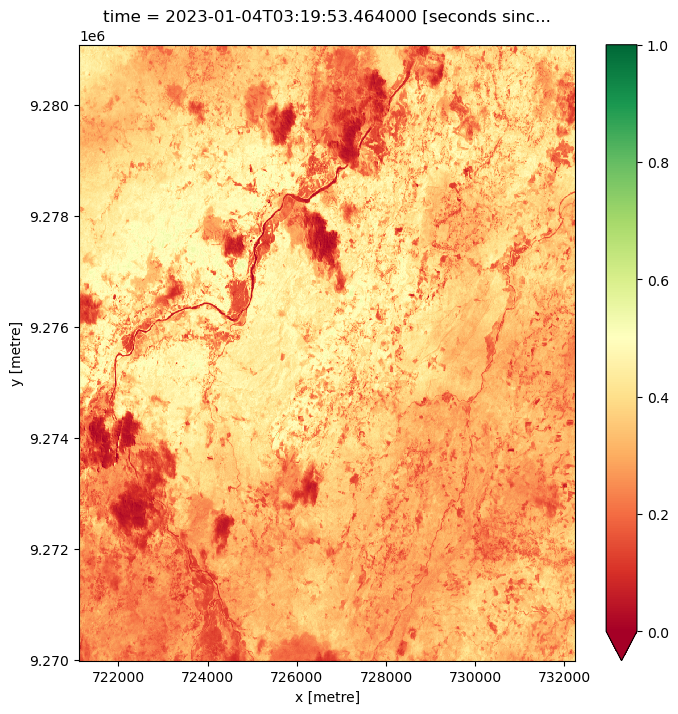

In [61]:
# Tetapkan time step NDVI yang ingin dilihat
ndvi_time_step = 0

# Ini adalah cara sederhana untuk memplot NDVI
# Perhatikan bahwa nilai tinggi kemungkinan besar merupakan vegetasi.
plt.figure(figsize=(8, 8))
ndvi.isel(time=ndvi_time_step).plot(cmap="RdYlGn", vmin=0, vmax=1)
plt.show()


> **Ekstensi 2**: Pada sel di atas, satu time step dipilih menggunakan metode `.isel()`.
Kita dapat memplot semua time step dengan menghapus metode `.isel()`, lalu memodifikasi metode `.plot()` menjadi `.plot(col='time', col_wrap=3)`, di mana `time` adalah timestep untuk gambar.
Memplot semua langkah waktu sekaligus dapat mempermudah dalam melihat perbedaan vegetasi dari waktu ke waktu. 

<Figure size 800x800 with 0 Axes>

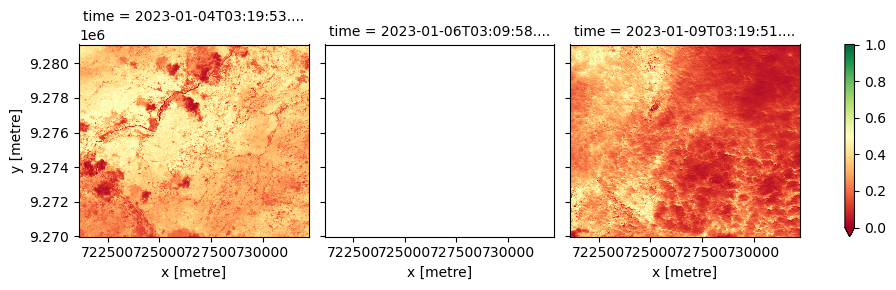

In [62]:
plt.figure(figsize=(8, 8))
ndvi.plot(col='time', cmap="RdYlGn", vmin=0, vmax=1, col_wrap=3)
plt.show()

## Langkah 5: Mengekspor Data



Terkadang, Anda ingin menganalisis citra satelit dalam program GIS, seperti QGIS.
Perintah `write_cog()` dari pustaka Open Data Cube memungkinkan data yang dimuat diekspor ke format GeoTIFF, yang umum digunakan untuk data geospasial.
Contoh berikut mengekspor gambar berdasarkan time_step yang diberikan.
Untuk informasi lebih lanjut tentang mengekspor beberapa gambar, lihat notebook Ekspor GeoTIFF.

> **Catatan**: File yang disimpan akan muncul di direktori yang sama dengan notebook ini, dan dapat diunduh untuk digunakan nanti.

In [66]:
# Anda bisa mengganti nama dari example.tiff ke nama yang Anda inginkan, jika perlu
filename = "sawah_jonggol.tif"

#write_cog(geo_im=dataset.isel(time=time_step).to_array(), fname=filename, overwrite=True)
ndvi.odc.write_cog("sawah_jonggol.tif", overwrite=True)

PosixPath('sawah_jonggol.tif')

## Langkah-langkah Selanjutnya yang Disarankan

### Untuk notebook ini


Banyak variabel yang digunakan dalam analisis ini dapat dikonfigurasi.
Kami menyarankan untuk kembali ke awal notebook ini dan menjalankan analisis dengan lokasi, tanggal, pengukuran, dan sebagainya yang berbeda.
Ini akan membantu memberikan pemahaman lebih dalam untuk menjalankan analisis Anda sendiri.
Jika Anda belum mencoba aktivitas ekstensi pada percobaan pertama, cobalah dan kerjakan ini saat Anda menjalankan notebook lagi.

### Untuk notebook lainnya


1. [Jupyter Notebooks](http://43.218.254.133:8888/notebooks/panduan-pengguna/01_Jupyter_notebooks.ipynb)
2. [Produk dan Pengukuran](http://43.218.254.133:8888/notebooks/panduan-pengguna/02_Product_dan_measurement.ipynb)
3. [Membuka Data](http://43.218.254.133:8888/notebooks/panduan-pengguna/03_Membuka_data.ipynb)
4. [Memplot Data](http://43.218.254.133:8888/notebooks/panduan-pengguna/04_Plotting.ipynb)
5. **Melakukan Analisis Dasar (notebook ini)**
6. [Pengenalan ke numpy](http://43.218.254.133:8888/notebooks/panduan-pengguna/06_numpy.ipynb)
7. [Pengenalan ke xarray](http://43.218.254.133:8888/notebooks/panduan-pengguna/07_xarray.ipynb)
8. [Pemrosesan Paralel dengan Dask](http://43.218.254.133:8888/notebooks/panduan-pengguna/08_Parallel_processing_dgn_dask.ipynb)


Setelah Anda menyelesaikan tutorial di atas, bergabunglah dengan pengguna tingkat lanjut untuk menjelajahi:

Direktori "Datasets" dalam repositori, tempat Anda dapat menjelajahi produk DE Africa secara mendalam.
Direktori "Frequently used code", yang berisi buku resep teknik dan metode umum untuk menganalisis data DE Africa.
Direktori "Real-world examples", yang menyediakan alur kerja dan studi kasus analisis yang lebih kompleks.



## Informasi Tambahan

**Lisensi:** Kode dalam notebook ini dilisensikan di bawah [Lisensi Apache, Versi 2.0](https://www.apache.org/licenses/LICENSE-2.0). 

**Kontak:** Jika Anda memerlukan bantuan, silakan ajukan pertanyaan di [Saluran Slack Open Data Cube](http://slack.opendatacube.org/) atau di [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) menggunakan tag `open-data-cube` (Anda dapat melihat pertanyaan yang sebelumnya diajukan [di sini](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
Jika Anda ingin melaporkan masalah dengan notebook ini, Anda dapat mengajukannya di [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Versi datacube yang kompatibel:**

In [23]:
print(datacube.__version__)

1.9.6


**Last Tested:** 

In [24]:
from datetime import date
print(date.today())

2025-07-24
